# IQR technique to handle the outliers

**Example 1**

Here's a Python code using the numpy library to demonstrate the IQR method for handling outliers:

In [86]:
import numpy as np

def detect_outliers_iqr(data, factor=1.5):
    """
    Detects outliers using IQR method.

    :param data: List or array-like data points.
    :param factor: Multiplier for IQR, usually 1.5. Adjust to be more or less strict.
    :return: List of outliers.
    """
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * factor)
    upper_bound = quartile_3 + (iqr * factor)

    outliers = [point for point in data if point < lower_bound or point > upper_bound]
    return outliers

# data points
data = [10, 12, 12, 13, 12, 11, 11, 52, 13, 12, 11]

# Detecting outliers
outliers = detect_outliers_iqr(data)

print("Outliers:", outliers)



Outliers: [52]


In the above code:

We first compute the first and third quartiles. We then compute the IQR. We identify the lower and upper bounds for what's considered a non-outlier. We finally return the list of values that are below the lower bound or above the upper bound as outliers.

**Example 2**

In [90]:
import pandas as pd
import seaborn as sns

# Load the diamonds dataset from seaborn
df = sns.load_dataset('diamonds')

# Calculate Q1, Q3, and IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows in dataframe to exclude data points that are outliers for 'price'
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print("Original Dataset Length:", len(df))
print("\nDataset Length without Outliers based on price:", len(df_no_outliers))


Original Dataset Length: 53940

Dataset Length without Outliers based on price: 50400


The output will show a difference in the lengths of the original dataset and the filtered dataset, indicating that some outlier rows based on the price column were removed.

You can also visualize the outliers using box plots. Before and after the filtering process:

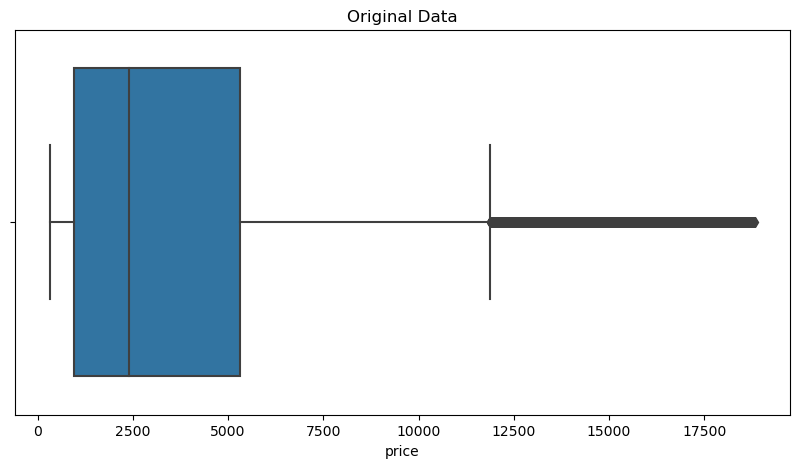

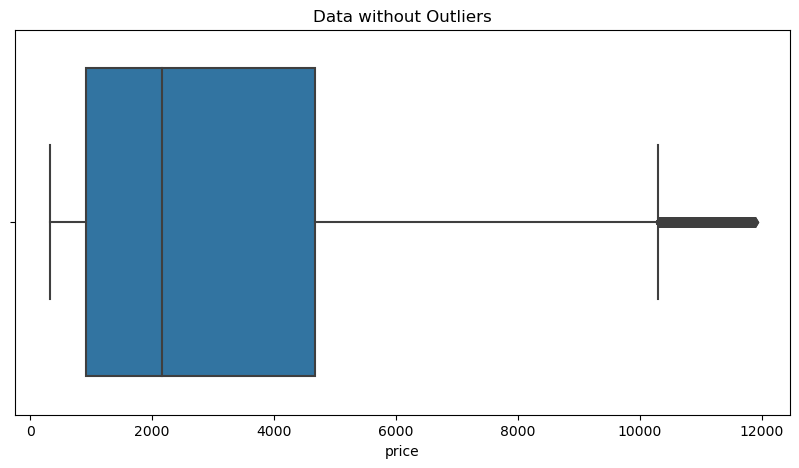

In [93]:
import matplotlib.pyplot as plt

# Original data visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['price'])
plt.title('Original Data')
plt.show()

# Data without outliers visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_no_outliers['price'])
plt.title('Data without Outliers')
plt.show()


In [95]:
# import sklearn module
import  sklearn
from sklearn import datasets

# Loading california dataset for getting outliers using IQR method
california_dateset = sklearn.datasets.fetch_california_housing(as_frame=True)
df = pd.DataFrame(california_dateset.data)

In [97]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [101]:
# Setting num_feature variable for a float column
num_feature='AveRooms'

In [103]:
# cal the first quartile and 3rd quartile
q1 = df[num_feature].quantile(0.25)
q3 = df[num_feature].quantile(0.75)

# calculate inter quantile range (IQR)
IQR= q3 -q1

# Sert thrreshold
thershold = 1.5

# Setting lower and upper bounds

lower_bound = q1 - thershold * IQR
upper_bound = q3 + thershold *IQR

# Identify outliers
outliers = df[(df[num_feature] < lower_bound)|(df[num_feature]> upper_bound)]

# Display outliers
print("Outliers using IQR METHOD")
print(outliers)

Outliers using IQR METHOD
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
73      0.4999      46.0  1.714286   0.571429        18.0  2.571429     37.81   
155     8.8793      52.0  8.972868   1.131783       861.0  3.337209     37.81   
511    13.4990      42.0  8.928358   1.000000      1018.0  3.038806     37.82   
512    12.2138      52.0  9.210227   1.039773      1001.0  2.843750     37.82   
514    12.3804      52.0  9.122715   1.033943      1192.0  3.112272     37.82   
...        ...       ...       ...        ...         ...       ...       ...   
20408   7.7889      26.0  8.730038   1.045627       842.0  3.201521     34.19   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
20436  12.5420      10.0  9.873315   1.102426      1179.0  3.177898     34.21   
20462   5.8578      21.0  8.652174   1.062112      1114.0  3.459627     34.28   

 

In [105]:
!jupyter nbconvert --to webpdf --allow-chromium-download Week8_Lab2.ipynb

[NbConvertApp] Converting notebook Week8_Lab2.ipynb to webpdf
[NbConvertApp] Building PDF
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 343965 bytes to Week8_Lab2.pdf
